<a href="https://colab.research.google.com/github/anbubsc2k14/Capstone-Project/blob/master/01_911_Calls_Data_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [0]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [0]:
df = pd.read_csv('911.csv')
#!head -28000 911.csv > 911_28k.csv

** Check the info() of the df **

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90686 entries, 0 to 90685
Data columns (total 9 columns):
lat          90686 non-null float64
lng          90686 non-null float64
desc         90685 non-null object
zip          79405 non-null float64
title        90685 non-null object
timeStamp    90685 non-null object
twp          90656 non-null object
addr         90685 non-null object
e            90685 non-null float64
dtypes: float64(4), object(5)
memory usage: 6.2+ MB


** Check the head of df **

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [12]:
df['zip'].value_counts().head()

19401.0    6420
19464.0    6125
19403.0    4436
19446.0    4351
19406.0    2894
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [13]:
df['twp'].value_counts().head()

LOWER MERION    7666
ABINGTON        5449
NORRISTOWN      5425
UPPER MERION    4750
CHELTENHAM      4155
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [14]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [0]:
df['Reason'] = df['title'].apply(lambda x : str(x).split(':')[0])

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [0]:
df['Reason'] = df['Reason'].replace('1',np.nan)

In [0]:
df.dropna(inplace=True)

In [19]:
df['Reason'].value_counts()

EMS        40605
Traffic    26947
Fire       11840
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

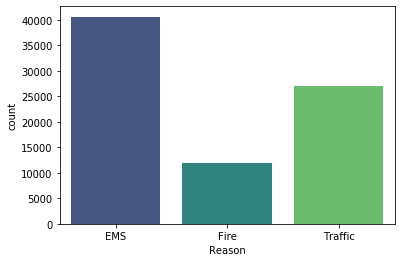

In [20]:
sns.countplot(x='Reason',data=df,palette='viridis')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [21]:
#dir(df['timeStamp'])
#df['timeStamp'].dtype
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [0]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [0]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [24]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0,Fire,14,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [0]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['week day'] = df['Day of Week'].map(dmap)

In [26]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,week day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0,Fire,14,12,3,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

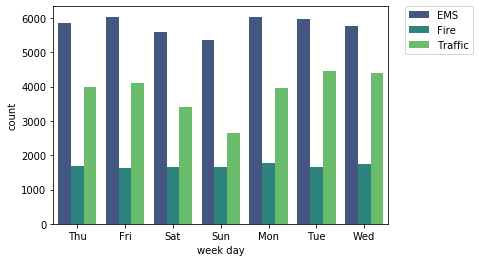

In [27]:
sns.countplot(x='week day',hue='Reason',data=df,palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

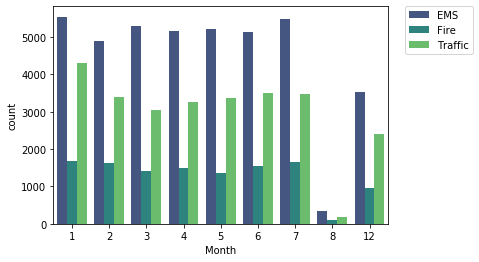

In [28]:
sns.countplot(x='Month',hue='Reason',data=df,palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [0]:
byMonth = df.groupby(by='Month').count().head()


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

In [30]:
byMonth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 13 columns):
lat            5 non-null int64
lng            5 non-null int64
desc           5 non-null int64
zip            5 non-null int64
title          5 non-null int64
timeStamp      5 non-null int64
twp            5 non-null int64
addr           5 non-null int64
e              5 non-null int64
Reason         5 non-null int64
Hour           5 non-null int64
Day of Week    5 non-null int64
week day       5 non-null int64
dtypes: int64(13)
memory usage: 560.0 bytes


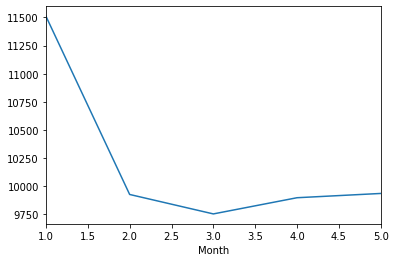

In [31]:
byMonth['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

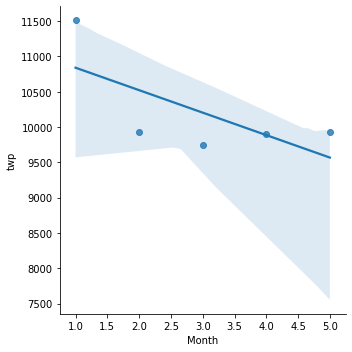

In [32]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [0]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

In [34]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,week day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0,Fire,14,12,3,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [36]:
dateGrp = df.groupby(by='Date').count()
dateGrp.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,week day
Date,,,,,,,,,,,,,,
2015-12-10,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2015-12-11,332,332,332,332,332,332,332,332,332,332,332,332,332,332
2015-12-12,334,334,334,334,334,334,334,334,334,334,334,334,334,334


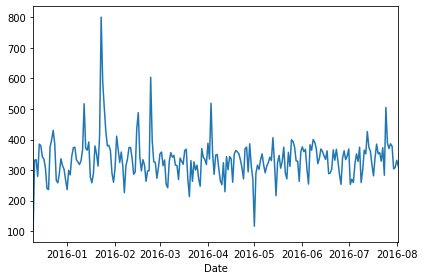

In [38]:
dateGrp['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

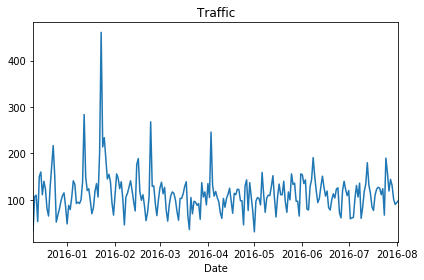

In [39]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

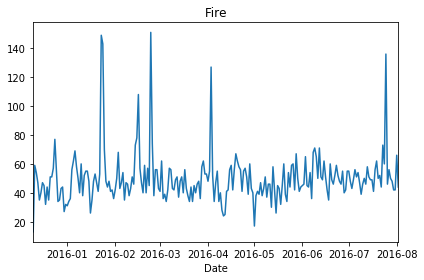

In [40]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

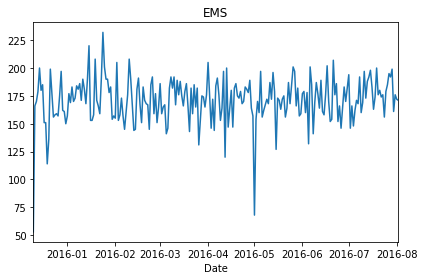

In [41]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [44]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
0,225,177,182,153,179,207,321,546,656,655,614,679,735,643,705,732,751,790,706,602,491,384,376,268
1,217,190,149,135,181,201,338,542,673,692,687,694,725,722,762,766,786,833,682,591,518,435,353,225
2,187,158,150,183,124,201,328,567,674,637,620,672,726,719,721,726,775,828,689,539,551,470,404,262
3,231,163,176,129,140,169,284,466,638,691,650,653,710,765,686,750,696,812,646,566,504,419,316,281
4,220,182,150,154,168,168,290,509,567,615,637,664,691,730,751,754,792,754,642,594,500,473,427,330
5,280,234,202,193,188,198,221,333,397,507,554,609,666,676,599,629,632,621,626,566,483,454,418,363
6,290,268,208,202,182,204,231,339,416,509,532,547,610,548,559,517,502,566,545,502,418,381,316,263


** Now create a HeatMap using this new DataFrame. **

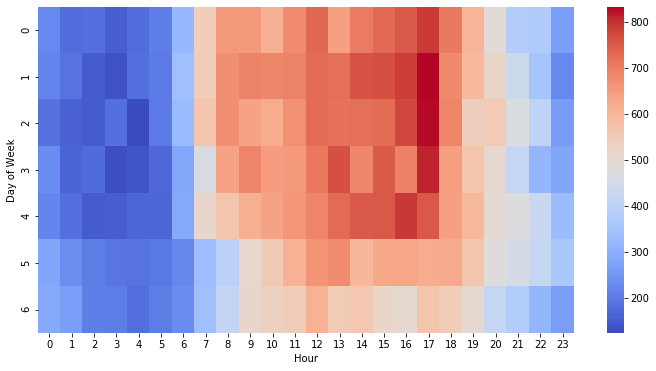

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

** Now create a clustermap using this DataFrame. **

<Figure size 864x432 with 0 Axes>

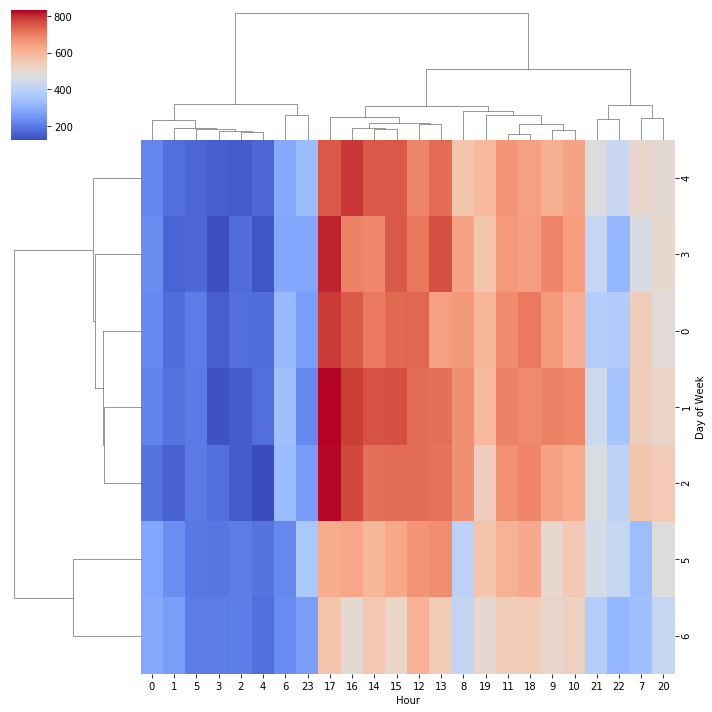

In [47]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='coolwarm')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [49]:
dayHour = df.groupby(by=['Month','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,,,,
1,246,193,196,176,174,194,324,479,670,655,600,680,695,680,674,601,636,767,701,608,493,410,369,290
2,220,170,140,130,154,192,275,490,508,543,545,503,587,582,555,616,544,567,582,522,446,389,383,283
3,187,165,167,133,143,168,255,436,475,516,584,552,575,592,573,635,666,578,537,482,430,351,313,240
4,213,177,153,141,156,160,263,452,523,543,533,572,619,608,610,621,648,624,541,472,445,318,260,245
5,225,161,143,140,155,164,229,394,520,549,523,638,628,588,588,620,617,689,492,429,432,413,361,237
6,204,167,139,136,120,160,240,395,504,559,540,603,677,639,638,659,676,678,574,481,416,411,326,261
7,215,207,162,178,160,178,230,377,490,564,553,564,633,671,675,665,689,708,603,582,471,438,357,254
8,17,9,15,9,8,14,22,34,38,35,47,40,30,33,46,54,45,56,32,27,12,6,7,9
12,123,123,102,106,92,118,175,245,293,342,369,366,419,410,424,403,413,537,474,357,320,280,234,173


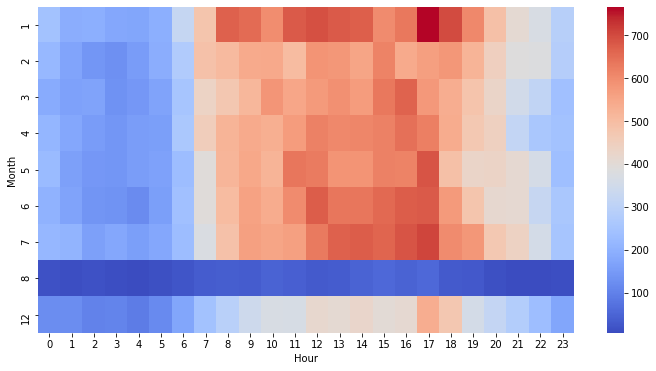

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

<Figure size 864x432 with 0 Axes>

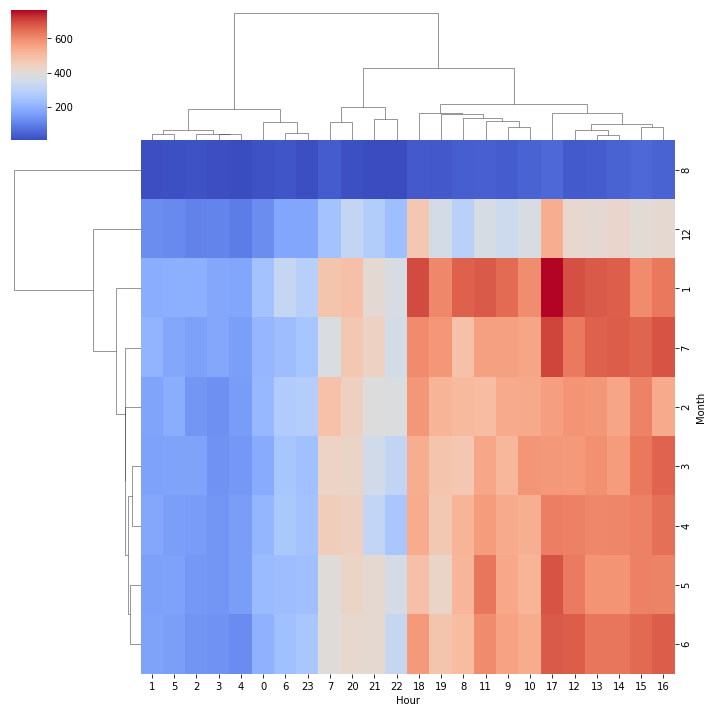

In [51]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='coolwarm')

**Continue exploring the Data however you see fit!**
# Great Job!